### Lineapy to automate data science work


<div>
<img src="https://user-images.githubusercontent.com/724072/165418570-7338c65b-0fd1-489c-b76a-f03f074f42ca.png" width="600"/>

</div>


LineaPy is a bridge between data science and machine learning engineering. When it saves the artifact, it automatically saved the codes to generate the artifacts. It is convinent for data scientists to log their work with codes, and helps to improve the efficiency of the experiment. The generated pipelins are easy for the eningeeirng deployment.

### Contents
 * [Save an artifact](#save-an-artifact)
 * [List the artifactor store](#list-artifact-store)
 * [Load an artifact](#load-an-artifact-version)
 * [Create a pipeline](#create-a-pipeline)

In [1]:
%load_ext lineapy

In [2]:
import os
import lineapy


import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Make NumPy printouts easier to read.
np.set_printoptions(precision=3, suppress=True)

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

In [3]:
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
                'Acceleration', 'Model Year', 'Origin']

raw_dataset = pd.read_csv(url, names=column_names,
                          na_values='?', comment='\t',
                          sep=' ', skipinitialspace=True)

In [4]:
dataset = raw_dataset.copy()
dataset.tail()

dataset.isna().sum()


dataset.loc['Origin'] = dataset['Origin'].map({1: 'USA', 2: 'Europe', 3: 'Japan'})
#one hot encoding
dataset = pd.get_dummies(dataset, columns=['Origin'], prefix='', prefix_sep='')
dataset.tail()
dataset = dataset.dropna()
train_dataset = dataset.sample(frac=0.8, random_state=0)
test_dataset = dataset.drop(train_dataset.index)

#sns.pairplot(train_dataset[['MPG', 'Cylinders', 'Displacement', 'Weight']], diag_kind='kde')

train_dataset.describe().transpose()

#normalization
train_dataset.describe().transpose()[['mean', 'std']]


first = np.array(train_dataset[:1])

with np.printoptions(precision=2, suppress=True):
    print('First example:', first)
    print()
  #drop na


First example: [[  28.     4.    90.    75.  2125.    14.5   74.     1.     0.     0. ]]



In [5]:
test_dataset.isna().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      0
Weight          0
Acceleration    0
Model Year      0
1.0             0
2.0             0
3.0             0
dtype: int64

In [6]:
train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop('MPG')
test_labels = test_features.pop('MPG')

normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(train_features)

Metal device set to: Apple M1


2022-06-18 15:52:45.504504: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-06-18 15:52:45.504748: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
2022-06-18 15:52:45.547660: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-06-18 15:52:45.618188: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-06-18 15:52:45.638074: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


### Save an artifact <a class="anchor" id="save-an-artifact"></a>

In [7]:
# Store the variable as an artifact
train_data_artifact = lineapy.save(train_features, "train_data")

# Check object type
print(type(train_data_artifact))



<class 'lineapy.api.api_classes.LineaArtifact'>


In [8]:
train_data_artifact.get_value().head()

,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,1.0,2.0,3.0
146,4.0,90.0,75.0,2125.0,14.5,74.0,1,0,0
282,4.0,140.0,88.0,2890.0,17.3,79.0,1,0,0
69,8.0,350.0,160.0,4456.0,13.5,72.0,1,0,0
378,4.0,105.0,63.0,2125.0,14.7,82.0,1,0,0
331,4.0,97.0,67.0,2145.0,18.0,80.0,0,0,1


In [9]:
print(train_data_artifact.get_code())

import pandas as pd

url = "http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data"
column_names = [
    "MPG",
    "Cylinders",
    "Displacement",
    "Horsepower",
    "Weight",
    "Acceleration",
    "Model Year",
    "Origin",
]
raw_dataset = pd.read_csv(
    url, names=column_names, na_values="?", comment="\t", sep=" ", skipinitialspace=True
)
dataset = raw_dataset.copy()
dataset = pd.get_dummies(dataset, columns=["Origin"], prefix="", prefix_sep="")
dataset = dataset.dropna()
train_dataset = dataset.sample(frac=0.8, random_state=0)
train_features = train_dataset.copy()
train_labels = train_features.pop("MPG")



In [10]:
# copy the above codes here to verify.

In [11]:
# Store the variable as an artifact
lineapy.save(train_labels, "train_labels")

# Check object type
print(type(train_labels))

# Store the variable as an artifact
test_data_artifact = lineapy.save(test_features, "test_data")

# Check object type
print(type(test_data_artifact))

# Store the variable as an artifact
train_label_art = lineapy.save(test_labels, "test_labels")

# Check object type
print(type(test_labels))

<class 'pandas.core.series.Series'>
<class 'lineapy.api.api_classes.LineaArtifact'>
<class 'pandas.core.series.Series'>


2022-06-18 15:52:48.587354: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-06-18 15:52:48.741320: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


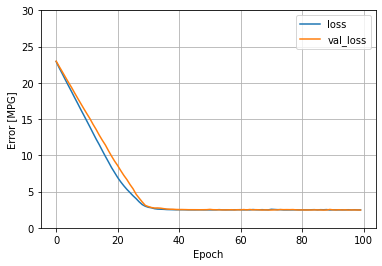

In [12]:
#Linear regression Model
linear_model = tf.keras.Sequential([
    normalizer,
    layers.Dense(units=1)
])



#linear_model.predict(train_features[:10])

#linear_model.layers[1].kernel

linear_model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

history = linear_model.fit(
    train_features,
    train_labels,
    epochs=100,
    # Suppress logging.
    verbose=0,
    # Calculate validation results on 20% of the training data.
    validation_split=0.2)

def plot_loss(history):
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.ylim([0, 30])
    plt.xlabel('Epoch')
    plt.ylabel('Error [MPG]')
    plt.legend()
    plt.grid(True)

plot_loss(history)

test_results = {}
test_results['linear_model'] = linear_model.evaluate(
    test_features, test_labels, verbose=0)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 9)                19        
 n)                                                              
                                                                 
 dense_1 (Dense)             (None, 64)                640       
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 4,884
Trainable params: 4,865
Non-trainable params: 19
_________________________________________________________________


2022-06-18 15:52:52.443087: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-06-18 15:52:52.614684: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


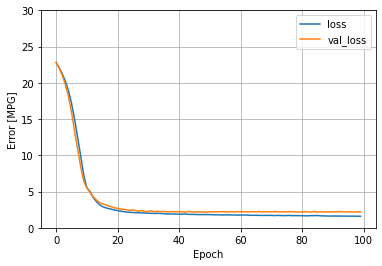

In [13]:
#DNN Model
def build_and_compile_model(norm):
    model = keras.Sequential([
      norm,
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(1)
    ])

    model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))
    return model

dnn_model = build_and_compile_model(normalizer)
dnn_model.summary()


history = dnn_model.fit(
    train_features,
    train_labels,
    validation_split=0.2,
    verbose=0, epochs=100)

def plot_loss(history):
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.ylim([0, 30])
    plt.xlabel('Epoch')
    plt.ylabel('Error [MPG]')
    plt.legend()
    plt.grid(True)

    
plot_loss(history)

test_results['dnn_model'] = dnn_model.evaluate(test_features, test_labels, verbose=0)



In [14]:
pd.DataFrame(test_results, index=['Mean absolute error [MPG]']).T

,Mean absolute error [MPG]
linear_model,2.480963
dnn_model,1.715403


In [15]:
model_artifact = lineapy.save(dnn_model, 'dnn_model')
test_results_artifact = lineapy.save(test_results, 'test_results')

Assets written to: ram://80466140-79af-4113-9877-d8df5da5511e/assets

In [16]:
print(model_artifact.get_code())

import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

url = "http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data"
column_names = [
    "MPG",
    "Cylinders",
    "Displacement",
    "Horsepower",
    "Weight",
    "Acceleration",
    "Model Year",
    "Origin",
]
raw_dataset = pd.read_csv(
    url, names=column_names, na_values="?", comment="\t", sep=" ", skipinitialspace=True
)
dataset = raw_dataset.copy()
dataset = pd.get_dummies(dataset, columns=["Origin"], prefix="", prefix_sep="")
dataset = dataset.dropna()
train_dataset = dataset.sample(frac=0.8, random_state=0)
train_features = train_dataset.copy()
train_labels = train_features.pop("MPG")
normalizer = tf.keras.layers.Normalization(axis=-1)


def build_and_compile_model(norm):
    model = keras.Sequential(
        [
            norm,
            layers.Dense(64, activation="relu"),
            layers.Dense(64, activation="relu"),
            laye

### List the artifacto store <a class="anchor" id="list-artifact-store"></a>

In [17]:
# List all saved artifacts
lineapy.artifact_store()

train_data:0 created on 2022-06-16 19:39:55.833463
train_data:1 created on 2022-06-17 02:31:34.222560
train_labels:0 created on 2022-06-17 02:31:47.336271
test_data:0 created on 2022-06-17 02:31:47.741501
test_labels:0 created on 2022-06-17 02:31:48.150291
train_data:2 created on 2022-06-17 02:37:44.322165
train_labels:1 created on 2022-06-17 02:37:49.389819
test_data:1 created on 2022-06-17 02:37:49.799428
test_labels:1 created on 2022-06-17 02:37:50.209388
train_data:3 created on 2022-06-17 02:56:02.199295
train_labels:2 created on 2022-06-17 02:56:14.624117
test_data:2 created on 2022-06-17 02:56:15.050927
test_labels:2 created on 2022-06-17 02:56:15.447512
train_data:4 created on 2022-06-17 02:59:00.727015
train_labels:3 created on 2022-06-17 02:59:05.123476
test_data:3 created on 2022-06-17 02:59:05.524397
test_labels:3 created on 2022-06-17 02:59:05.913697
train_data:5 created on 2022-06-17 03:00:11.696949
train_labels:4 created on 2022-06-17 03:00:14.147130
test_data:4 created o

By default, the get() method retrieves the latest version of the given artifact. To retrieve a particular version of the artifact, we can specify the value of the optional argument version

In [18]:
lineapy.get('train_data').version

13

### Load an artifact <a class="anchor" id="load-an-artifact-version"></a>
By default, lineapy loads the latest version

In [19]:
train_mod_art = lineapy.get('train_data', version=7)

In [20]:
train_mod_art.get_value().head()

,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,1.0,2.0,3.0
114,4.0,98.0,90.0,2265.0,15.5,73.0,0,1,0
283,6.0,232.0,90.0,3265.0,18.2,79.0,1,0,0
69,8.0,350.0,160.0,4456.0,13.5,72.0,1,0,0
157,8.0,350.0,145.0,4440.0,14.0,75.0,1,0,0
332,4.0,89.0,62.0,1845.0,15.3,80.0,0,1,0


### Create a pipleline <a class="anchor" id="create-a-pipeline"></a>
The artifacts may contain duplicate codes. The pipeline will detect any overlap and will not repeat the codes.

Given the recurring updates in the source data, we may want to build and schedule a pipeline to automatically rerun the code of both artifacts on a regular basis.

In [21]:
# Build an Airflow pipeline with both length and width artifacts
lineapy.to_pipeline(
    artifacts=[train_data_artifact.name, train_label_art.name, train_mod_art.name, test_data_artifact.name, test_results_artifact.name],
    pipeline_name="demo_pipeline",
    framework="AIRFLOW",
    dependencies={
      train_mod_art.name: { train_data_artifact.name, train_label_art.name}, test_results_artifact.name:{train_mod_art.name, test_data_artifact.name}
   },
    output_dir="output/00_api_basics/demo_pipeline/",
)

Pipeline source generated in the directory: output/00_api_basics/demo_pipeline

Generated python module demo_pipeline.py

Generated Dockerfile demo_pipeline_Dockerfile

Generated requirements file demo_pipeline_requirements.txt

Added Airflow DAG named demo_pipeline_dag. Start a run from the Airflow UI or CLI.

PosixPath('output/00_api_basics/demo_pipeline')

In [22]:
!ls output/00_api_basics/demo_pipeline

demo_pipeline.py               demo_pipeline_dag.py
demo_pipeline_Dockerfile       demo_pipeline_requirements.txt


In [23]:
!cat output/00_api_basics/demo_pipeline/demo_pipeline_dag.py

import os

import demo_pipeline
from airflow import DAG
from airflow.operators.python_operator import PythonOperator
from airflow.utils.dates import days_ago

default_dag_args = {"owner": "airflow", "retries": 2, "start_date": days_ago(1)}

dag = DAG(
    dag_id="demo_pipeline_dag",
    schedule_interval="*/15 * * * *",
    max_active_runs=1,
    catchup=False,
    default_args=default_dag_args,
)


train_data = PythonOperator(
    dag=dag,
    task_id="train_data_task",
    python_callable=demo_pipeline.train_data,
)

test_labels = PythonOperator(
    dag=dag,
    task_id="test_labels_task",
    python_callable=demo_pipeline.test_labels,
)

train_data = PythonOperator(
    dag=dag,
    task_id="train_data_task",
    python_callable=demo_pipeline.train_data,
)

test_data = PythonOperator(
    dag=dag,
    task_id="test_data_task",
    python_callable=demo_pipeline.test_data,
)

test_results = PythonOperator(
    dag=dag,
    task_id="test_results_task",
    python_callable=demo_pipelin

In [24]:
!cat output/00_api_basics/demo_pipeline/demo_pipeline_requirements.txt

lineapy
matplotlib==3.5.2
numpy==1.22.4
pandas==1.4.2
seaborn==0.11.2
tensorflow==2.9.2
tensorflow.keras==2.9.0
